In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
%matplotlib inline

# afsnt 데이터 EDA

In [2]:
data_afsnt = pd.read_csv('C:/Users/user/Desktop/bigcon/data/AFSNT.CSV')

In [3]:
data_afsnt_dly = pd.read_csv('C:/Users/user/Desktop/bigcon/data/AFSNT_DLY.CSV')

In [4]:
data_sfsnt = pd.read_csv('C:/Users/user/Desktop/bigcon/data/SFSNT.CSV')

In [5]:
data_afsnt.head(3)

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,N,10:05,10:32,N,NaN,N,NaN
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,9:30,9:31,N,NaN,N,NaN
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,12:45,13:03,N,NaN,N,NaN


# 결측치 확인/대체

In [6]:
data_afsnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987709 entries, 0 to 987708
Data columns (total 17 columns):
SDT_YY    987709 non-null int64
SDT_MM    987709 non-null int64
SDT_DD    987709 non-null int64
SDT_DY    987709 non-null object
ARP       987709 non-null object
ODP       987709 non-null object
FLO       987709 non-null object
FLT       987709 non-null object
REG       979446 non-null object
AOD       987709 non-null object
IRR       987709 non-null object
STT       987709 non-null object
ATT       987709 non-null object
DLY       987709 non-null object
DRR       118937 non-null object
CNL       987709 non-null object
CNR       8259 non-null object
dtypes: int64(3), object(14)
memory usage: 128.1+ MB


REG, DRR, CNR에 null값 존재

In [7]:
data_afsnt.isna().sum()

SDT_YY         0
SDT_MM         0
SDT_DD         0
SDT_DY         0
ARP            0
ODP            0
FLO            0
FLT            0
REG         8263
AOD            0
IRR            0
STT            0
ATT            0
DLY            0
DRR       868772
CNL            0
CNR       979450
dtype: int64

In [8]:
data_afsnt_dly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16076 entries, 0 to 16075
Data columns (total 12 columns):
SDT_YY      16076 non-null int64
SDT_MM      16076 non-null int64
SDT_DD      16076 non-null int64
SDT_DY      16076 non-null object
ARP         16076 non-null object
ODP         16076 non-null object
FLO         16076 non-null object
FLT         16076 non-null object
AOD         16076 non-null object
STT         16076 non-null object
DLY         0 non-null float64
DLY_RATE    0 non-null float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


In [9]:
# 우선 결측치에 'blank'로 채워넣기
data_afsnt['REG'] = data_afsnt['REG'].fillna('blank')
data_afsnt['DRR'] = data_afsnt['DRR'].fillna('blank')
data_afsnt['CNR'] = data_afsnt['CNR'].fillna('blank')

In [10]:
data_afsnt.isna().sum()

SDT_YY    0
SDT_MM    0
SDT_DD    0
SDT_DY    0
ARP       0
ODP       0
FLO       0
FLT       0
REG       0
AOD       0
IRR       0
STT       0
ATT       0
DLY       0
DRR       0
CNL       0
CNR       0
dtype: int64

In [11]:
data_afsnt.head(3)

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,N,10:05,10:32,N,blank,N,blank
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,9:30,9:31,N,blank,N,blank
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,12:45,13:03,N,blank,N,blank


In [12]:
# 지연,결항 사유를 많은 순서대로 나열
weather_data = data_afsnt[['DRR','DLY']][data_afsnt['DLY'] == 'Y'].groupby('DRR')['DLY'].value_counts().sort_values(ascending=[False])
DRR = []
DLY = []
for i in weather_data.index:
    DRR.append(i[0])
for i in weather_data.index:
    DLY.append(i[1])

rank_DRR = pd.DataFrame({'VALUE' : weather_data, 'rank' : range(1,37)})
rank_DRR = rank_DRR.sort_values(by='DRR')
rank_DRR['DRR_KOREAN'] = ['안개','강설','강우','태풍','강풍','상층풍','운고','기상-항로','기상-뇌우','기상-기타','계류장혼잡',
                    '사고','활주로사정','행사','공항폐쇄','이륙대기','Curfew','A/C정비','A/c접속','승객접속','여객처리',
                    '지상조업','SKD변경','항공기부족','환자','제방빙작업','보안검색','조종사자격','승무원휴식',
                    '승무원연결','화물탑재','화물연결','항로혼잡','관제','복합원인','기타']

rank_DRR = rank_DRR.sort_values(by='rank')
rank_DRR.head(12) # 12개까지 많은 수를 보인다고 봤다

,,VALUE,rank,DRR_KOREAN
DRR,DLY,,,
C02,Y,107738,1,A/c접속
C01,Y,2031,2,A/C정비
A01,Y,1524,3,안개
C10,Y,1227,4,제방빙작업
D01,Y,950,5,항로혼잡
C03,Y,907,6,승객접속
C14,Y,873,7,승무원연결
Z99,Y,664,8,기타
A05,Y,596,9,강풍


In [13]:
# 날씨 사유 중 어느것이 많은 가 살펴본다.
rank_DRR.loc[['A01','A02','A03','A04','A05','A06','A07','A08','A09','A10','A99'],:]

,,VALUE,rank,DRR_KOREAN
DRR,DLY,,,
A01,Y,1524,3,안개
A05,Y,596,9,강풍
A02,Y,361,11,강설
A10,Y,164,14,기상-뇌우
A99,Y,139,15,기상-기타
A07,Y,75,19,운고
A09,Y,72,20,기상-항로
A04,Y,49,22,태풍
A03,Y,33,26,강우


In [14]:
data_sfsnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 17 columns):
SSC    1186 non-null object
FLT    1186 non-null object
ORG    1186 non-null object
DES    1186 non-null object
STD    1168 non-null object
STA    1167 non-null object
FLO    1186 non-null object
MON    754 non-null object
TUE    750 non-null object
WED    745 non-null object
THU    745 non-null object
FRI    748 non-null object
SAT    749 non-null object
SUN    727 non-null object
FSD    1186 non-null int64
FED    1186 non-null int64
IRR    1186 non-null object
dtypes: int64(2), object(15)
memory usage: 157.6+ KB


In [15]:
# sfsnt데이터 시간 null값 채우기
sta_index = list(data_sfsnt[data_sfsnt['STA'].isna()==True].index)
std_index = list(data_sfsnt[data_sfsnt['STD'].isna()==True].index)
# sta과 std 둘다 없는 곳에 둘다 0 넣기
data_sfsnt.loc[684,'STD'] = '00:00'
data_sfsnt.loc[684,'STA'] = '00:00'
# sta와 std에 하나씩 비어있어서 각 출발시간과 도착시간을 같게 넣어줘서 계산에서 뺄 수 있도록
data_sfsnt.loc[std_index,'STD'] = data_sfsnt.loc[std_index,'STA']
data_sfsnt.loc[sta_index,'STA'] = data_sfsnt.loc[sta_index,'STD']


In [16]:
data_sfsnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 17 columns):
SSC    1186 non-null object
FLT    1186 non-null object
ORG    1186 non-null object
DES    1186 non-null object
STD    1186 non-null object
STA    1186 non-null object
FLO    1186 non-null object
MON    754 non-null object
TUE    750 non-null object
WED    745 non-null object
THU    745 non-null object
FRI    748 non-null object
SAT    749 non-null object
SUN    727 non-null object
FSD    1186 non-null int64
FED    1186 non-null int64
IRR    1186 non-null object
dtypes: int64(2), object(15)
memory usage: 157.6+ KB


In [17]:
# 시간 표시를 ':'제거하고 숫자로된 문자열로 변환하기
def time_to_str(time):
    hour_str = ""
    hour = 0
    minute = ""
    ind = time.find(':',0,4)
    hour = int(time[:ind])
    if hour < 10:
        hour_str = '0'+str(hour)
    else:
        hour_str = str(hour)
    minute = time[ind+1:]
    return hour_str+minute

data_afsnt['STT'] = data_afsnt['STT'].apply(lambda x : time_to_str(x))
data_afsnt['ATT'] = data_afsnt['ATT'].apply(lambda x : time_to_str(x))
data_afsnt_dly['STT'] = data_afsnt_dly['STT'].apply(lambda x : time_to_str(x))
data_sfsnt['STD'] = data_sfsnt['STD'].apply(lambda x : time_to_str(x))
data_sfsnt['STA'] = data_sfsnt['STA'].apply(lambda x : time_to_str(x))

In [18]:
data_afsnt.head(3)

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,N,1005,1032,N,blank,N,blank
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,0930,0931,N,blank,N,blank
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,1245,1303,N,blank,N,blank


In [19]:
def split_hour_to_int(time):
    hour = 0
    hour = int(time[0:2])
    return hour

def split_minute_to_int(time):
    minute = 0
    minute = int(time[2:])
    return minute

data_afsnt['HOUR'] = data_afsnt['STT'].apply(lambda x : split_hour_to_int(x))
data_afsnt['MINUTE'] = data_afsnt['STT'].apply(lambda x : split_minute_to_int(x))
data_afsnt_dly['HOUR'] = data_afsnt_dly['STT'].apply(lambda x : split_hour_to_int(x))
data_afsnt_dly['MINUTE'] = data_afsnt_dly['STT'].apply(lambda x : split_minute_to_int(x))
data_sfsnt['STA_HOUR'] = data_sfsnt['STA'].apply(lambda x : split_hour_to_int(x))
data_sfsnt['STA_MINUTE'] = data_sfsnt['STA'].apply(lambda x : split_minute_to_int(x))
data_sfsnt['STD_HOUR'] = data_sfsnt['STD'].apply(lambda x : split_hour_to_int(x))
data_sfsnt['STD_MINUTE'] = data_sfsnt['STD'].apply(lambda x : split_minute_to_int(x))

In [20]:
data_afsnt['GROUP'] = [sorted([i,j])[0] + sorted([i,j])[1] for i,j in zip(data_afsnt['ARP'],data_afsnt['ODP'] )] 
data_afsnt_dly['GROUP'] = [sorted([i,j])[0] + sorted([i,j])[1] for i,j in zip(data_afsnt_dly['ARP'],data_afsnt_dly['ODP'] )] 
data_sfsnt['GROUP'] = [sorted([i,j])[0] + sorted([i,j])[1] for i,j in zip(data_sfsnt['ORG'],data_sfsnt['DES'] )] 
data_afsnt['DISTANCE'] = [k + sorted([i,j])[0] + sorted([i,j])[1] for i,j,k in zip(data_afsnt['ARP'],data_afsnt['ODP'],data_afsnt['FLO'] )] 

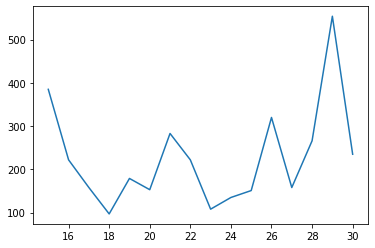

In [21]:
#9월달 일일별 지연횟수
data_afsnt['DLY_NUM'] = data_afsnt['DLY'].apply(lambda x : 1 if x == 'Y' else 0)
sep_dly_count_by_month = data_afsnt.groupby(by=['SDT_MM','SDT_DD'])['DLY_NUM'].sum()[9]
plt.plot(sep_dly_count_by_month[14:31])
plt.show()

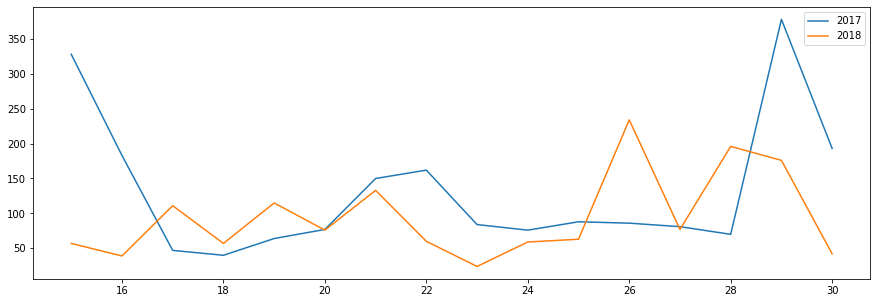

In [22]:
#연도별 9월달 15일~30일까지 지연 횟수
a = data_afsnt.groupby(by=['SDT_YY','SDT_MM','SDT_DD'])['DLY_NUM'].sum()
a_2017 = a.loc[2017]
a_2018 = a.loc[2018]
a_2017_09 = a_2017.loc[9]
a_2018_09 = a_2018.loc[9]


# 2017년, 2018년 9월 15일~30일 지연 횟수 비교
plt.figure(figsize = (15,5))
plt.plot(a_2017_09[14:31])
plt.plot(a_2018_09[14:31])
plt.legend(['2017','2018'])
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54943 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current

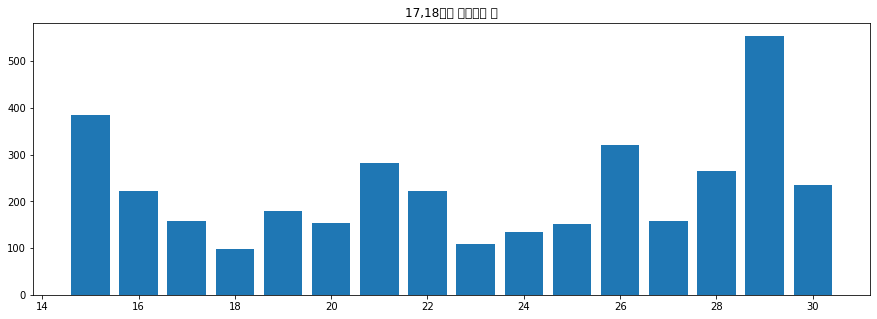

In [23]:
# 2017년도 2018년도 9월달 지연횟수 합
plt.figure(figsize = (15,5))
sum_09 = a_2017_09[14:31]+a_2018_09[14:31]
plt.bar(sum_09.index,sum_09)
plt.title('17,18년도 지연횟수 합')
plt.show()

9월달 일자별 발생횟수는 중요하지 않은 것 같다. 이것으로 학습을 하려면 다년도에 걸친 9월달 데이터가 더 필요하다.

ARP
ARP1     310665
ARP10        12
ARP11      3658
ARP12      4880
ARP13      4248
ARP14      1897
ARP15     13696
ARP2     121513
ARP3     393607
ARP4      33623
ARP5      16321
ARP6      34472
ARP7       3163
ARP8      33195
ARP9      12759
Name: DLY_NUM, dtype: int64


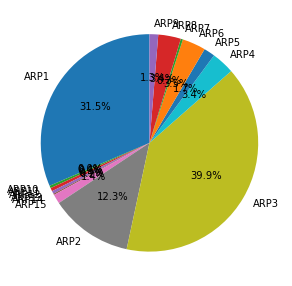

In [24]:
# 공항별 지연 횟수
air_name = data_afsnt.groupby(by='ARP')['DLY_NUM'].count()
print(air_name)
plt.figure(figsize = (8,5))
plt.pie(air_name[:], labels=air_name.index, startangle=90,autopct='%1.1f%%',labeldistance=1.1)
plt.show()

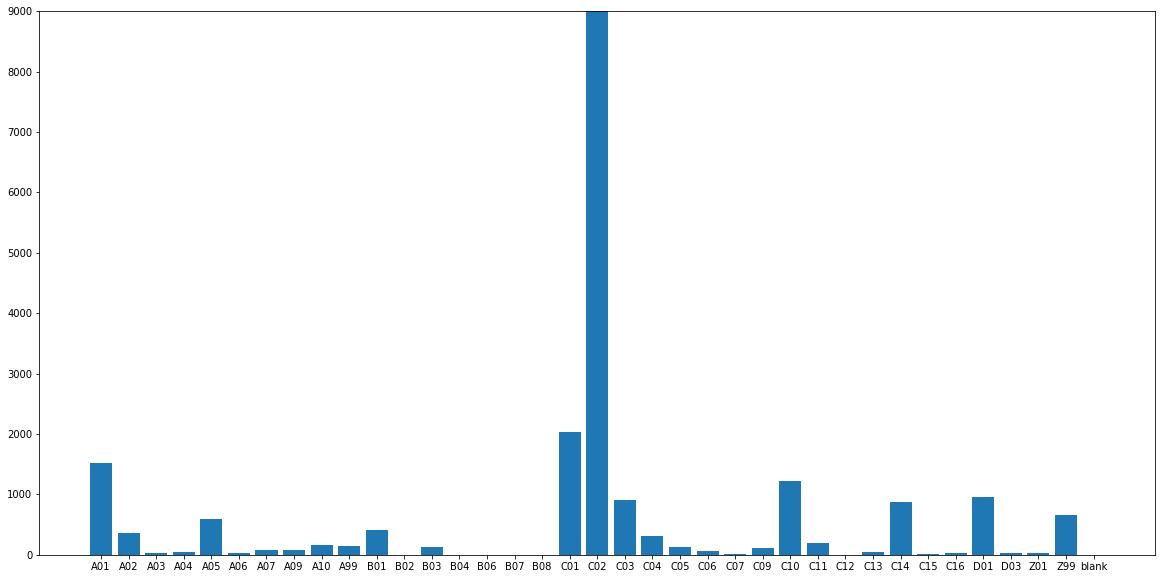

In [25]:
# 지연 사유별 지연 횟수
drr = data_afsnt.groupby('DRR')['DLY_NUM'].sum()
plt.figure(figsize=(20, 10))
plt.ylim(0,9000)
plt.bar(drr.index,drr[:])
plt.show()

ac접속지연이 다른 것에 비해서 너무 큰 비중을 차지한다.

In [26]:
#9월달에 날씨때문에 결항을 얼마나 했나 보려고 한다.
reason_weather= ['A01','A02','A03','A04','A05','A06','A07','A08','A09','A10','A99']
dly_weather_sep = data_afsnt.groupby(by=['SDT_YY','SDT_MM','SDT_DD','DRR'])['DLY_NUM'].value_counts()
dly_weather_sep.head(3)
dly_weather_sep.index

s = dly_weather_sep.loc[[2017,2018],9,15:,reason_weather,1]
s
#엄청 작다

SDT_YY  SDT_MM  SDT_DD  DRR  DLY_NUM
2017    9       18      A01  1          2
                20      A99  1          1
                25      A01  1          2
                        A99  1          1
                26      A05  1          1
                27      A07  1          5
2018    9       19      A09  1          2
                22      A01  1          5
                23      A01  1          1
Name: DLY_NUM, dtype: int64

In [27]:
# 2017,2018 9월 15~30에 지연 발생 원인 중 연결지연을 뺀 지연횟수
dly_weather_sep.loc[[2017,2018],9,15:,:,1].sum()-dly_weather_sep.loc[[2017,2018],9,15:,'C02',1].sum()

318

In [28]:
# 날씨 원인이 전체에서 6%정도 차지한다.
s.sum()/318

0.06289308176100629

In [29]:
# 날씨 지연이 얼마나 차지하는지
dly_weather = data_afsnt.groupby(by=['SDT_YY','SDT_MM','SDT_DD','DRR'])['DLY_NUM'].value_counts()
dly_weather.head(3)
dly_weather.index

s2 = dly_weather.loc[:,:,:,reason_weather,1]
all_delay_num = dly_weather.loc[:,:,:,:,1]
all_delay_num_c02 = all_delay_num.loc[:,:,:,'C02',:].sum()

In [30]:
# 연결 지연을 제외하면 날씨가 전체 지연에서 약 27%정도 차지한다. 중요한 정보다.
s2.sum()/(all_delay_num.sum()-all_delay_num_c02) 

0.27145280828645413

In [31]:
# 날씨 사유 중 어느것이 많은 가 살펴본다.
weather_data = data_afsnt[['DRR','DLY']][data_afsnt['DLY'] == 'Y'].groupby('DRR')['DLY'].value_counts().sort_values(ascending=[False])
weather_data.index
DRR = []
DLY = []
for i in weather_data.index:
    DRR.append(i[0])
for i in weather_data.index:
    DLY.append(i[1])

rank_DRR = pd.DataFrame({'DRR' : DRR, 'DLY' : DLY, 'VALUE' : weather_data, 'rank' : range(1,37)})
rank_DRR.loc[['A01','A02','A03','A04','A05','A06','A07','A08','A09','A10','A99'],:]
#안개- 강풍- 강설- 뇌우 순으로 영향이 컸다.

,,DRR,DLY,VALUE,rank
DRR,DLY,,,,
A01,Y,A01,Y,1524,3
A05,Y,A05,Y,596,9
A02,Y,A02,Y,361,11
A10,Y,A10,Y,164,14
A99,Y,A99,Y,139,15
A07,Y,A07,Y,75,19
A09,Y,A09,Y,72,20
A04,Y,A04,Y,49,22
A03,Y,A03,Y,33,26


In [32]:
# 시간대별 지연횟수 살펴보기

## 파생변수

In [33]:
# ac접속지연의 첫 지연발생점 확인하기? 또는 연속되는 줄을 찾아내는 알고리즘?
# 하나가 지연되었을 때 뒤에 연결된 항공편들을 알아내야 뒤에 항공편들이 지연된다는 것을 알 수 있으니까
# 처음에 지연 일어났을 때 시간이 얼마나 지연되는 지 구해서 연결지연이 점점 어떻게 영향을 받는지 구해야 될거 같다 갈수록 지연시간이 줄어들어 지연이 멈추게 된다.
# 앞에 비행기와 연결된다는 표시가 있어야 그 시간을 다음 비행기에 영향으로 줄 수 있을 거 같다.
# 항공편별 시간순서를 나타내줄 수 있는 변수가 필요할 거 같다(연결지연 때문에)  위 문장이랑 비슷한 내용
# 날씨 상위 4개 사유를 범위를 정해줘서 값으로 넣어준다
# flt에서 출발공항과 도착공항이 같은 것을 그룹핑한다.


In [34]:
# 파생변수
# 두 공항간의 거리(공항에서 원래 예상하는 시간) sfsnt 데이터에서 구할 수 있음

# 날짜와 공항에 따른 날씨  (그 전에 만약 눈이 얼마나 내려야 결항인가 이런 것도 알아보자, 바람은 어느정도 세기 이상이어야 지연인지)
# 근데 날씨를 넣어버리면 날씨에 의해서 100% 지연여부가 학습될 수 있기때문에 문제다. 과거시점에 정확한 날씨를 학습해버리면 날씨에 의해서
#지연여부가 결정되기때문에 과거에도 더 과거에서 예보한 날씨를 넣어야 할 것이다.
# FLT에서 공항과 상대공항이 같은 것들을 그룹핑이 필요해보인다.
# FLO별 평균 비행시간


In [35]:
# asd = 0
# for i in range(len(D_ATT):
#     D_ATT.tolist()
# asd


In [36]:
# 파생변수 비행시간 추가 'LATE_TIME '
def hour(time):
    indx = 2
    hour = 0
    hour = int(time[0:indx])
    return hour
def minute(time):
    indx = 2
    minute = 0
    minute = float(time[indx:])
    return minute / 60

data_afsnt['LATE_TIME']= data_afsnt['ATT'].apply(lambda x : hour(x))-data_afsnt['STT'].apply(lambda x : hour(x))+ (data_afsnt['ATT'].apply(lambda x : minute(x))-data_afsnt['STT'].apply(lambda x : minute(x)))

In [37]:
data_afsnt.head(4)[['STT','ATT','LATE_TIME','DLY']]

,STT,ATT,LATE_TIME,DLY
0,1005,1032,0.450000,N
1,0930,0931,0.016667,N
2,1245,1303,0.300000,N
3,1325,1409,0.733333,Y


In [38]:
# 파생변수 
# 두 공항간의 FLO별 평균 지연시간  FLO_LATE_TIME
test_prepro = data_afsnt.sort_values(by=['SDT_YY','SDT_MM','SDT_DD','GROUP'])
late_time = test_prepro.groupby(['ARP','ODP','FLO','AOD'])['LATE_TIME'].mean()
late_time = pd.DataFrame(late_time)
late_time_index =  [list(i) for i in late_time.index]  #튜플이라 리스트로 바꿔줌
late_time.head(3)

LATE_TIME
ARP  ODP  FLO AOD           
ARP1 ARP1 A   D       -14.75
          I   A         0.35
              D         0.35

In [39]:
# 파생변수
# 두 공항간의 FLO별 예상비행시간  DISTANCE
test_data_1 = data_sfsnt[:]
test_data_1.head(3)
for i in range(len(test_data_1)):
    if test_data_1['STA'][i] == test_data_1['STD'][i]:
        test_data_1.drop(i,axis=0,inplace = True)

test_data_1.reset_index(drop=True)
test_data_1['STA_HOUR'], test_data_1['STD_HOUR'] = test_data_1['STA_HOUR']*60, test_data_1['STD_HOUR']*60
test_data_1['Time'] = test_data_1['STA_HOUR'] - test_data_1['STD_HOUR'] + test_data_1['STA_MINUTE'] - test_data_1['STD_MINUTE']
distance_by_group = test_data_1.groupby(['FLO','GROUP'])['Time'].mean()
distance_by_group = pd.DataFrame(distance_by_group)


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

## FLO별 공항에서 공항까지 지연되는 평균시간(구해서 pickle에 넣어놨음)

In [40]:
# 파생변수 
# 두 공항간의 FLO별 평균 지연시간  FLO_LATE_TIME

# late = data_afsnt[:]
# def late_times():
#     lis = []
#     i = 0
#     for a,b,c,d in zip(late['ARP'],late['ODP'],late['FLO'],late['AOD']):
#         lis.append(late_time.loc[a,b,c,d][0])
#         if i % 20000 == 0:
#             print(i)
#         i = i + 1
#     return lis

# late['FLO_TIME'] = late_times()

##  FLO별 공항과 공항과의 예상비행시간(아직 못구함.....)

In [41]:
# 파생변수
# 두 공항간의 FLO별 예상비행시간  DISTANCE

unique = list(data_afsnt_dly['GROUP'].unique())
print(len(unique))

s = data_afsnt[data_afsnt['GROUP'] == unique[0]].sort_values(by=['SDT_YY','SDT_MM','SDT_DD','REG','STT'])
s = pd.DataFrame(s)
s = s.reset_index(drop = True)
print(s['FLO'].value_counts())
s.groupby(['FLO','AOD']).count().head(6)


22
A    100199
J     87694
H     70858
F     63955
I     53813
L     50572
B     19442
Name: FLO, dtype: int64


SDT_YY  SDT_MM  SDT_DD  SDT_DY    ARP    ODP    FLT    REG    IRR  \
FLO AOD                                                                      
A   A     50100   50100   50100   50100  50100  50100  50100  50100  50100   
    D     50099   50099   50099   50099  50099  50099  50099  50099  50099   
B   A      9721    9721    9721    9721   9721   9721   9721   9721   9721   
    D      9721    9721    9721    9721   9721   9721   9721   9721   9721   
F   A     31977   31977   31977   31977  31977  31977  31977  31977  31977   
    D     31978   31978   31978   31978  31978  31978  31978  31978  31978   

           STT  ...    DLY    DRR    CNL    CNR   HOUR  MINUTE  GROUP  \
FLO AOD         ...                                                     
A   A    50100  ...  50100  50100  50100  50100  50100   50100  50100   
    D    50099  ...  50099  50099  50099  50099  50099   50099  50099   
B   A     9721  ...   9721   9721   9721   9721   9721    9721   9721   
    D     9721  ...   9721   9721   9721   9721   9721    9721   9721   
F   A    31977  ...  31977  31977  31977  31977  31977   31977  31977   
    D    31978  ...  31978  31978  31978  31978  31978   31978  31978   

         DISTANCE  DLY_NUM  LATE_TIME  
FLO AOD                                
A   A       50100    50100      50100  
    D       50099    50099      50099  
B   A        9721     9721       9721  
    D        9721     9721       9721  
F   A       31977    31977      31977  
    D       31978    31978      31978  

[6 rows x 21 columns]

In [42]:
test_data_2 = data_afsnt[:]

In [43]:
# test_data_2 = test_data_2.replace('AARP1ARP3',70)
# print(1)
# test_data_2 = test_data_2.replace('JARP1ARP3',70)
# print(2)
# test_data_2 = test_data_2.replace('IARP1ARP3',70)
# print(3)
# test_data_2 = test_data_2.replace('HARP1ARP3',70)
# print(4)
# test_data_2 = test_data_2.replace('FARP1ARP3',65)
# print(5)
# test_data_2 = test_data_2.replace('LARP1ARP3',70)
# print(6)
# test_data_2 = test_data_2.replace('BARP1ARP3',70)
# print(7)
# test_data_2 = test_data_2.replace('LARP3ARP4',60)
# print(8)
# test_data_2 = test_data_2.replace('JARP3ARP4',62.5)
# print(9)
# test_data_2 = test_data_2.replace('AARP3ARP4',62.5)
# print(10)
# test_data_2 = test_data_2.replace('HARP3ARP4',67.5)
# print(11)
# test_data_2 = test_data_2.replace('BARP3ARP4',67.5)
# print(12)

##  FLO별 공항과 공항과의 실제비행시간의 평균

## pickle로 저장(오래걸려서)

In [44]:
import pickle
# with open('late.pkl', 'wb') as fout:
#      pickle.dump(late, fout)
with open('late.pkl', 'rb') as fin:
    late = []
    late = pickle.load(fin)


In [45]:
data_afsnt['FLO_LATE_TIME'] = late['FLO_TIME']
del(late)
data_afsnt.head(3)


,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,...,DRR,CNL,CNR,HOUR,MINUTE,GROUP,DISTANCE,DLY_NUM,LATE_TIME,FLO_LATE_TIME
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,...,blank,N,blank,10,5,ARP3ARP6,JARP3ARP6,0,0.450000,0.364749
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,...,blank,N,blank,9,30,ARP3ARP6,JARP3ARP6,0,0.016667,0.030233
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,...,blank,N,blank,12,45,ARP3ARP6,JARP3ARP6,0,0.300000,0.030233


In [46]:
temp_data = data_afsnt.sort_values(by=['SDT_YY','SDT_MM','SDT_DD','FLT'])
temp_data.groupby(['GROUP','FLT','AOD'])['HOUR','MINUTE'].count()
test_temp = temp_data[['SDT_YY','SDT_MM','SDT_DD','GROUP','FLT','AOD','HOUR','MINUTE','FLO_LATE_TIME']]
test_temp.head(3)

,SDT_YY,SDT_MM,SDT_DD,GROUP,FLT,AOD,HOUR,MINUTE,FLO_LATE_TIME
200345,2017,1,1,ARP2ARP3,A1001,D,8,30,0.247377
200453,2017,1,1,ARP2ARP3,A1001,A,9,20,0.067833
200273,2017,1,1,ARP2ARP3,A1003,D,15,5,0.247377


In [47]:
# asdf = test_temp.groupby(['SDT_YY','SDT_MM','SDT_DD','GROUP','FLT','AOD'])['HOUR','MINUTE'].sum()
# ind = asdf.index
# ind = ind.tolist()
# ind_all = list(ind)
# print(ind_all[0])
# inds = [k[0:5] for k in ind ]
# inds = list(inds)
# print(inds[0])
# # print([inds[0][0],inds[0][1],inds[0][2],inds[0][3],inds[0][4],'A'])
# result = []
# result = [asdf.loc[inda[0],inda[1],inda[2],inda[3],inda[4],'A'] - asdf.loc[inda[0],inda[1],inda[2],inda[3],inda[4],'D'] if (((inda[0],inda[1],inda[2],inda[3],inda[4],'A') in ind_all) and ((inda[0],inda[1],inda[2],inda[3],inda[4],'D') in ind_all)) else 0  for inda in inds]

# asdf[[inds.append('A')]
# result = [num * 3 for num in a if num % 2 == 0]
# test_temp['DISTANCE'] = [asdf[ind_text,'D']['HOUR']-asdf[ind_text,'A']['HOUR']for ind_text in ind ]
# test_temp[test_temp['GROUP']==ind[0][3]]['DISTANCE'] = 

In [48]:
# 모델적합 (시간, 날씨, 자기상관, 고려 안함) ARP, FLT, REG, AOD, IRR, DLY, DRR, CNL, CNR, FLY_TiME
# 가능하면 scale 해주고 적합해보자
# outlier도 제거해보자
# flt에서 출발공항과 도착공항이 같은 것을 그룹핑한다.




In [49]:
# 시간 그룹핑
temp = data_afsnt[data_afsnt['IRR'] == 'N']
def group_time(hour):
    if hour in [1,2,3,4]:
        hour = 2.5
    elif hour == 5:
        hour = 5
    elif hour in [6,7]:
        hour = 6.5
    elif hour in [8,9]:
        hour = 8.5
    elif hour in [10,11,12]:
        hour = 11
    elif hour in [13,14,15]:
        hour = 14
    elif hour in [16,17,18]:
        hour = 17
    elif hour in [19,20,21]:
        hour = 20
    elif hour == 22:
        hour = 22
    else:
        hour = 23
    return hour

temp['HOUR'] = temp['HOUR'].apply(lambda x : group_time(x))


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [71]:

def drop_features(df):
    temps = df.drop(['DISTANCE','SDT_YY','SDT_DY','REG','MINUTE','GROUP','FLT','IRR','SDT_MM','STT','ATT','DRR','DLY_NUM','LATE_TIME','CNL','CNR'],axis = 1, inplace = False)
    return temps
temps = drop_features(temp)
temps.head(3)

,SDT_DD,ARP,ODP,FLO,AOD,DLY,HOUR,FLO_LATE_TIME
0,1,ARP3,ARP6,J,D,N,11.0,0.364749
1,1,ARP3,ARP6,J,A,N,8.5,0.030233
2,1,ARP3,ARP6,J,A,N,11.0,0.030233


In [51]:
# flo_late_time 스케일링(robust scale)

# from sklearn.preprocessing import RobustScaler
# robustScaler = RobustScaler()
# robustScaler.fit(pd.DataFrame(temps['FLO_LATE_TIME']))
# temps['FLO_LATE_TIME'] = robustScaler.transform(pd.DataFrame(temps['FLO_LATE_TIME']))


In [72]:
def encode_features(dataDF):
    features = ['SDT_DD','ARP','FLO','AOD','DLY','ODP']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

temps = encode_features(temps)
temps.head(3)

,SDT_DD,ARP,ODP,FLO,AOD,DLY,HOUR,FLO_LATE_TIME
0,0,7,10,5,1,0,11.0,0.364749
1,0,7,10,5,0,0,8.5,0.030233
2,0,7,10,5,0,0,11.0,0.030233


In [73]:
# test train 데이터 나누기 838468
y = temps['DLY']
x = temps.drop('DLY',axis = 1)
X_train = x[:838468]
X_test = x[838468:]
y_train = y[:838468]
y_test = y[838468:]

In [74]:
data_afsnt.head(3)

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,...,DRR,CNL,CNR,HOUR,MINUTE,GROUP,DISTANCE,DLY_NUM,LATE_TIME,FLO_LATE_TIME
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,...,blank,N,blank,10,5,ARP3ARP6,JARP3ARP6,0,0.450000,0.364749
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,...,blank,N,blank,9,30,ARP3ARP6,JARP3ARP6,0,0.016667,0.030233
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,...,blank,N,blank,12,45,ARP3ARP6,JARP3ARP6,0,0.300000,0.030233


In [84]:
# X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [85]:
# over_sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_over, y_train_over = smote.fit_sample(X_train,y_train)
print(X_train.shape,y_train.shape)
print(X_train_over.shape,y_train_over.shape)
print(pd.Series(y_train_over).value_counts())

(772867, 7) (772867,)
(1360270, 7) (1360270,)
1    680135
0    680135
dtype: int64


In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


# 결정트리, random forest, 로지스틱 회귀
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred1 = dt_clf.predict(X_test)
print('DecisionTree1 정확도: ', accuracy_score(y_test,dt_pred1))

dt_clf.fit(X_train_over,y_train_over)
dt_pred2 = dt_clf.predict(X_test)
print('DecisionTree2 정확도: ', accuracy_score(y_test,dt_pred2))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train_over,y_train_over)
rf_pred = rf_clf.predict(X_test)
print('RandomForest 정확도: ', accuracy_score(y_test,rf_pred))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train_over,y_train_over)
lr_pred= lr_clf.predict(X_test)
print('Logist 정확도: ', accuracy_score(y_test,lr_pred))


DecisionTree1 정확도:  0.8800002070211214
DecisionTree2 정확도:  0.6910572051113515


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest 정확도:  0.6883762815901292


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logist 정확도:  0.6349803588711138


In [ ]:
# xgboost 적합
import xgboost as xgb
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
params = {
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stoppings':100
}
num_rounds = 350

wlist = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round = num_rounds, evals = wlist)

In [ ]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10],3))

preds_xg = [1 if x>0.5 else 0 for x in pred_probs]
print(preds_xg[5:15])



In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax = ax)

In [87]:
# 오차행렬
cm  = confusion_matrix(y_test, dt_pred1)
print('decision_tree:\n', cm)
cm  = confusion_matrix(y_test, dt_pred2)
print('decision_tree:\n', cm)
cm  = confusion_matrix(y_test, rf_pred)
print('random_forest:\n', cm)
cm  = confusion_matrix(y_test, lr_pred)
print('logistic:\n', cm)


decision_tree:
 [[169777    453]
 [ 22733    254]]
decision_tree:
 [[119725  50505]
 [  9188  13799]]
random_forest:
 [[119087  51143]
 [  9068  13919]]
logistic:
 [[107245  62985]
 [  7543  15444]]


In [88]:
print('Feature importance:\n{0}'.format(dt_clf.feature_importances_))
print('Feature importance:\n{0}'.format(rf_clf.feature_importances_))
print('Feature importance:\n{0}'.format(lr_clf.coef_))

Feature importance:
[0.38573221 0.03115751 0.03140288 0.04335383 0.04399589 0.12565242
 0.33870527]
Feature importance:
[0.42348952 0.04049312 0.03081823 0.04813445 0.15928782 0.13575046
 0.16202641]
Feature importance:
[[ 0.005609    0.01096103 -0.00718729 -0.0231189   0.36133903  0.07983201
   2.85826782]]


In [89]:
# 평가함수, ROC커브 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score,roc_curve


def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:4f}, 정밀도: {1:4f}, 재현율: {2:4f}'.format(accuracy,precision,recall))
    print('f1스코어: {0:4f}'.format(f1))

def roc_curve_plot(y_test,pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs,tprs,label = 'ROC')
    #가운데 대각선 직선
    plt.plot([0,1],[0,1],'k--',label = 'Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-sensitivity)'); plt.ylabel('TPR(recall)')
    plt.legend()

In [90]:
# 평가하기
get_clf_eval(y_test,dt_pred1)
get_clf_eval(y_test,dt_pred2)
get_clf_eval(y_test,rf_pred)
get_clf_eval(y_test,lr_pred)
get_clf_eval(y_test,preds_xg)

오차행렬
[[169777    453]
 [ 22733    254]]
정확도: 0.880000, 정밀도: 0.359264, 재현율: 0.011050
f1스코어: 0.021440
오차행렬
[[119725  50505]
 [  9188  13799]]
정확도: 0.691057, 정밀도: 0.214590, 재현율: 0.600296
f1스코어: 0.316161
오차행렬
[[119087  51143]
 [  9068  13919]]
정확도: 0.688376, 정밀도: 0.213934, 재현율: 0.605516
f1스코어: 0.316165
오차행렬
[[107245  62985]
 [  7543  15444]]
정확도: 0.634980, 정밀도: 0.196917, 재현율: 0.671858
f1스코어: 0.304567


NameError: name 'preds_xg' is not defined

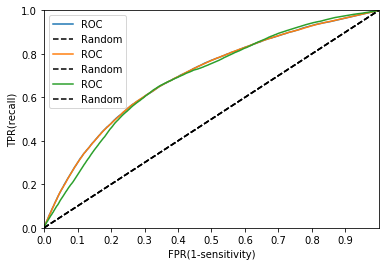

In [91]:
# ROC커브
pred_proba1 = dt_clf.predict_proba(X_test)
pred_proba2 = rf_clf.predict_proba(X_test)
pred_proba3 = lr_clf.predict_proba(X_test)

roc_curve_plot(y_test,pred_proba1[:,1])
roc_curve_plot(y_test,pred_proba2[:,1])
roc_curve_plot(y_test,pred_proba3[:,1])

In [92]:
print(mean_squared_error(y_test, dt_pred1, sample_weight=None))
print(mean_squared_error(y_test, dt_pred2, sample_weight=None))
print(mean_squared_error(y_test, rf_pred, sample_weight=None))
print(mean_squared_error(y_test, lr_pred, sample_weight=None))

0.11999979297887867
0.3089427948886485
0.31162371840987074
0.3650196411288862


# afsnt_dly 데이터 EDA

In [ ]:
# data load
data_afsnt_dly = pd.read_csv('C:/Users/user/Desktop/bigcon/data/AFSNT_DLY.CSV')

In [ ]:
data_afsnt_dly.head(4)

In [ ]:
data_afsnt_dly.info()

# sfsnt 데이터 EDA

In [ ]:
# data load
data_sfsnt = pd.read_csv('C:/Users/user/Desktop/bigcon/data/SFSNT.CSV')

In [ ]:
data_sfsnt.info()
data_sfsnt.head(3)

In [ ]:
# temp = data_sfsnt[['SSC','FLT','ORG','DES','FLO','FSD','FED']]
# temp_group = temp.groupby(by=['FLT','ORG','DES','FLO','FSD','FED'])['SSC']
# temp_group = temp_group.value_counts()
# temp_group.loc[['L1702','L1720','L1808'],:,:,'L',:,:]

In [ ]:
# print(data_sfsnt.loc[:,:,:,:,:,'L',:,:,:,:,:,:,:,20190916,:,:])
data_afsnt_dly.head(7)

In [ ]:
data_sfsnt[data_sfsnt['FLO'] == 'A'].sort_values(by=['STD_HOUR','STD_MINUTE'])